# Arbol de decisión para especies de flores

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import os
from graphviz import Source
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/camil/OneDrive/Escritorio/PracticaAI/python-ml-course-master/datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

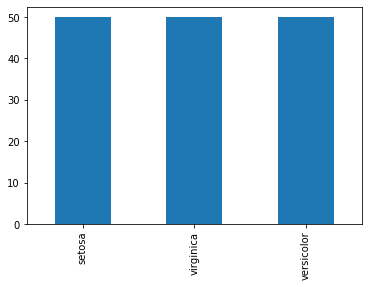

In [4]:
data.Species.value_counts().plot.bar()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [6]:
data['is_training'] = np.random.uniform(0,1,len(data))<=0.75

(array([ 40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 110.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

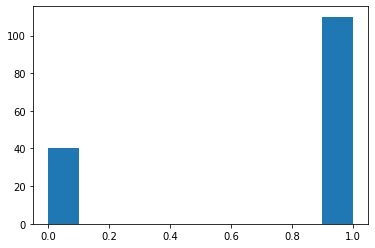

In [7]:
plt.hist(data.is_training.astype(int))

In [8]:
train, test = data[data['is_training']==True],data[data['is_training']==False]

In [9]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, random_state=99) #min_samples_leaf= 
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [10]:
pred = tree.predict(test[predictors])
pd.crosstab(test[target],pred,rownames=['Actual'],colnames=['predictions'])

predictions,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,15,1
virginica,0,0,9


## Visualizacion del arbol de decision

In [11]:
with open('C:/Users/camil/OneDrive/Escritorio/PracticaAI/iris_tree.dot','w') as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [12]:
file = open('C:/Users/camil/OneDrive/Escritorio/PracticaAI/iris_tree.dot','r')
text = file.read()

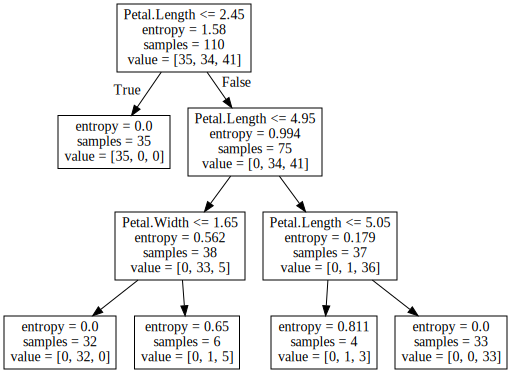

In [13]:
Source(text)

## Cross Validation para la poda
divide el dataset en conjunto de entrenamiento y prueba, y lleva a cabo varias veces el algoritmo para intentar generalizar los resultados en el modelo

In [14]:
X = data[predictors]
Y = data[target]

In [15]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [16]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [17]:
score = np.mean(cross_val_score(tree, X, Y, scoring='accuracy',cv=cv,n_jobs=1))
score

0.9333333333333333

# Random forest Clasificador

In [18]:
from  sklearn.ensemble import RandomForestClassifier

In [21]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True,n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97142857, 0.02857143, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97058824, 0.02941176, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [23]:
forest.oob_score_

0.96